# Model-Based Control (SVG)

In [1]:
import seaborn as sns
from lqsvg.experiment import plot
from lqsvg.experiment.utils import wandb_runs_dataframe
from matplotlib import pyplot as plt

sns.set()

/Users/angelolovatto/Library/Caches/pypoetry/virtualenvs/lqsvg-G_e_Olvw-py3.8/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


## Policy gradient ascent with perfect gradients

In [2]:
PERFECT_GRADS = wandb_runs_dataframe(
    "angelovtt/ch5",
    configs={"perfect_grad": True},
    tags="ModelBasedControl SVG".split(),
)
PERFECT_GRADS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 70 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   collect/episode_return_max              2493 non-null   float64
 1   time_this_iter_s                        2493 non-null   float64
 2   grad_acc                                2493 non-null   float64
 3   collect/episode_logp_mean               2493 non-null   float64
 4   collect/obs_mean                        2493 non-null   float64
 5   optimal_value                           2493 non-null   float64
 6   _step                                   2493 non-null   int64  
 7   true_value                              2493 non-null   float64
 8   timesteps_total                         2493 non-null   int64  
 9   collect/act_std                         2493 non-null   float64
 10  iterations_since_restore                2493 non-null   int6

In [5]:
PERFECT_GRADS["config/seed"].unique()

array([784, 780, 783, 782, 781])

In [7]:
PERFECT_GRADS["training_iteration"][PERFECT_GRADS["config/seed"] == 780]

505       31
506       47
507       59
508       62
509       66
        ... 
1020    9863
1021    9905
1022    9908
1023    9921
1024    9930
Name: training_iteration, Length: 520, dtype: int64

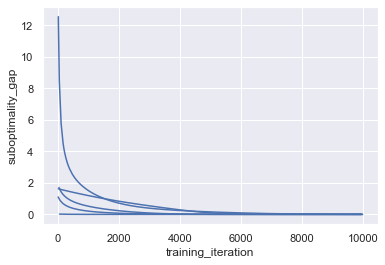

In [8]:
sns.lineplot(
    data=PERFECT_GRADS,
    x="training_iteration",
    y="suboptimality_gap",
    units="config/experiment_id",
    estimator=None,
)
plt.show()

## SVG with perfect models using the MAAC($K$) estimator

**default system**
dim$(\mathcal{S})$ = dim$(\mathcal{A})$ = 2

In [15]:
PERFECT_MODEL = wandb_runs_dataframe(
    "angelovtt/ch5",
    configs={"perfect_grad": False, "model.perfect_model": True},
    tags="ModelBasedControl SVG ".split(),
)

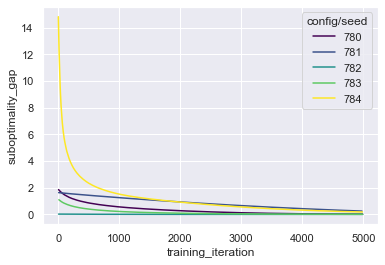

In [20]:
sns.lineplot(
    data=PERFECT_MODEL.query("`config/env_config/n_state` == `config/env_config/n_ctrl`"),
    x="training_iteration",
    y="suboptimality_gap",
    hue="config/seed",
#     units="config/experiment_id",
    estimator=None,
    palette="viridis",
)
plt.show()

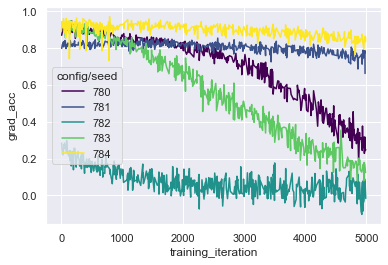

In [21]:
sns.lineplot(
    data=PERFECT_MODEL.query("`config/env_config/n_state` == `config/env_config/n_ctrl`"),
    x="training_iteration",
    y="grad_acc",
    hue="config/seed",
    estimator=None,
    palette="viridis",
)
plt.show()

**underactuated system** dim$(\mathcal{S}) = 8$, dim$(\mathcal{A}) = 2$

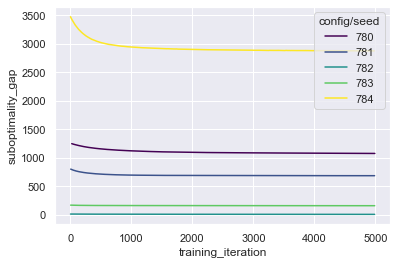

In [23]:
sns.lineplot(
    data=PERFECT_MODEL.query("`config/env_config/n_state` == 8 & `config/env_config/n_ctrl` == 2"),
    x="training_iteration",
    y="suboptimality_gap",
    hue="config/seed",
    estimator=None,
    palette="viridis",
)
plt.show()

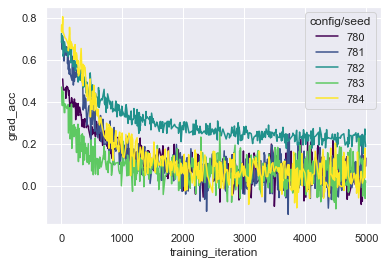

In [24]:
sns.lineplot(
    data=PERFECT_MODEL.query("`config/env_config/n_state` == 8 & `config/env_config/n_ctrl` == 2"),
    x="training_iteration",
    y="grad_acc",
    hue="config/seed",
    estimator=None,
    palette="viridis",
)
plt.show()

**overactuated system** dim$(\mathcal{S}) = 2$, dim$(\mathcal{A}) = 8$

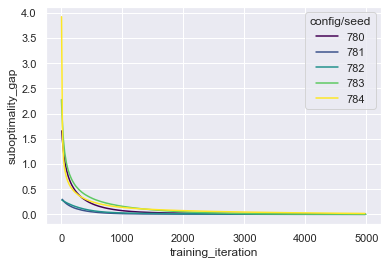

In [26]:
sns.lineplot(
    data=PERFECT_MODEL.query("`config/env_config/n_state` == 2 & `config/env_config/n_ctrl` == 8"),
    x="training_iteration",
    y="suboptimality_gap",
    hue="config/seed",
    estimator=None,
    palette="viridis",
)
plt.show()

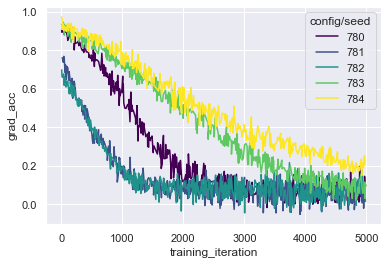

In [27]:
sns.lineplot(
    data=PERFECT_MODEL.query("`config/env_config/n_state` == 2 & `config/env_config/n_ctrl` == 8"),
    x="training_iteration",
    y="grad_acc",
    hue="config/seed",
    estimator=None,
    palette="viridis",
)
plt.show()